<a href="https://colab.research.google.com/github/gnanimail/NLP/blob/master/LSTM_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.datasets import mnist
from keras.utils import np_utils
from keras import initializers

In [3]:
# Hyper_parameters
batch_size = 128
nb_epoch = 5

In [4]:
# parameters for mnist dataset
img_rows, img_cols = 28, 28
nb_classes = 10

In [5]:
# Parameters for LSTM network
nb_lstm_outputs = 30
nb_time_steps = img_rows
dim_input_vector = img_cols

In [6]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
input_shape = (nb_time_steps,dim_input_vector)

11493376/11490434 [==============================] - 2s 0us/step


In [7]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [14]:
# bulid model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1:]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 28, 128)           80384     
_________________________________________________________________
dropout_10 (Dropout)         (None, 28, 128)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_12 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [15]:
# Training the model
lstm_model = model.fit(X_train, y_train, 
                        epochs=nb_epoch, 
                        batch_size=batch_size, 
                        shuffle=True,
                        validation_data=(X_test, y_test),
                        verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 114s 2ms/step - loss: 1.0673 - accuracy: 0.6440 - val_loss: 0.2628 - val_accuracy: 0.9179
Epoch 2/5
60000/60000 [==============================] - 113s 2ms/step - loss: 0.2897 - accuracy: 0.9190 - val_loss: 0.1400 - val_accuracy: 0.9603
Epoch 3/5
60000/60000 [==============================] - 114s 2ms/step - loss: 0.1713 - accuracy: 0.9543 - val_loss: 0.0968 - val_accuracy: 0.9733
Epoch 4/5
60000/60000 [==============================] - 113s 2ms/step - loss: 0.1298 - accuracy: 0.9661 - val_loss: 0.2600 - val_accuracy: 0.9462
Epoch 5/5
60000/60000 [==============================] - 114s 2ms/step - loss: 0.1028 - accuracy: 0.9737 - val_loss: 0.1641 - val_accuracy: 0.9656


In [16]:
# Evaluation
evaluation = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

10000/10000 [==============================] - 5s 475us/step
Summary: Loss over the test dataset: 0.16, Accuracy: 0.97


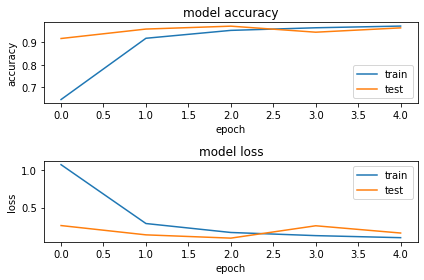

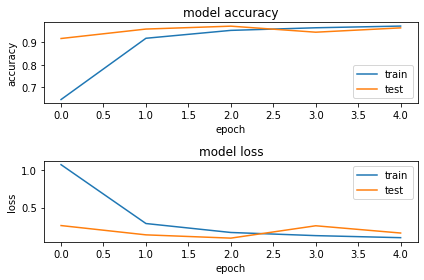

In [17]:
import matplotlib.pyplot as plt

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(lstm_model.history['accuracy'])
plt.plot(lstm_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(lstm_model.history['loss'])
plt.plot(lstm_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

([], <a list of 0 Text major ticklabel objects>)

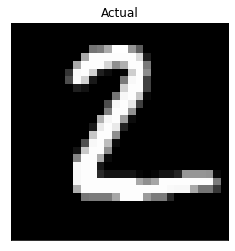

In [25]:
plt.imshow(X_test[1].reshape(28,28), cmap='gray', interpolation='none')
plt.title("Actual")
plt.xticks([])
plt.yticks([])

In [36]:
#Prediction
x = X_test[1].reshape(28,28)
x = np.expand_dims(x, axis=0)
preds = model.predict_classes(x)
print(preds[0])

2
